## Test 3D Cellpose for image.sc question

In [ ]:
from skimage.io import imread
import os
from tnia.plotting.projections import show_xy_zy_max
from tnia.plotting.plt_helper import imshow_multi2d

parent_path =r'D:\images\tnia-python-images\\imagesc\\2024_11_26_Cellpose_noise'
im = imread(os.path.join(parent_path, r'CROP.tif'))

## Take a look at data

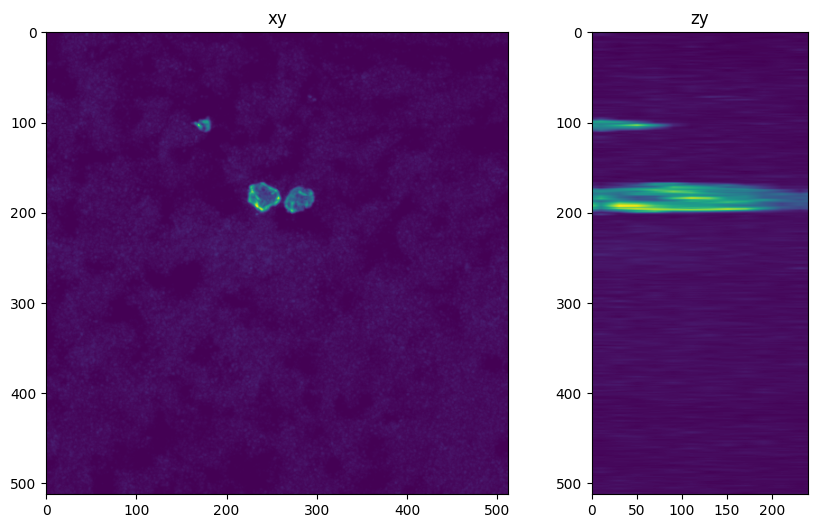

In [11]:
fig = show_xy_zy_max(im, sz=20, figsize=(10, 6))

## Import Cellpose and initiate cyto3 model

In [ ]:
from cellpose import models, io
#logging.basicConfig(level=logging.INFO)
mod = models.Cellpose(gpu=True, model_type="cyto3")

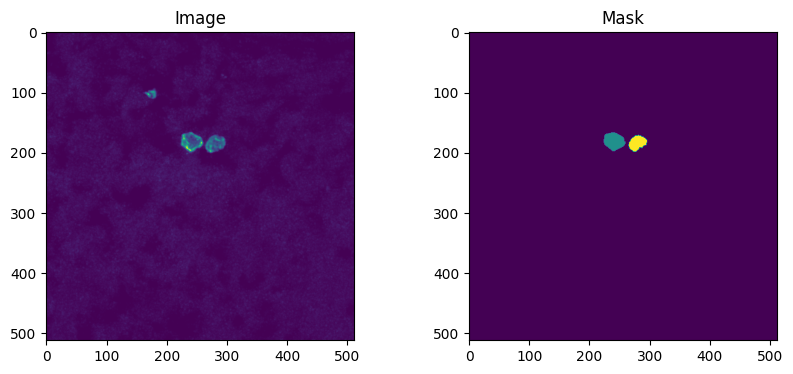

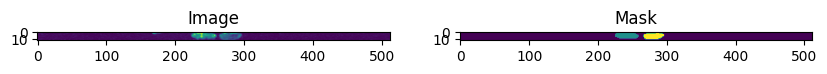

In [66]:
# take max projection
imgxyproj = im.max(axis=0)
imgxzproj = im.max(axis=1)

maskxyproj = mod.eval(imgxyproj, diameter=30, channels=[0,0], cellprob_threshold=2.0)[0]
maskxzproj = mod.eval(imgxzproj, diameter=30, channels=[0,0], cellprob_threshold=2.0)[0]

fig = imshow_multi2d([imgxyproj, maskxyproj], ['Image', 'Mask'], 1, 2)
fig = imshow_multi2d([imgxzproj, maskxzproj], ['Image', 'Mask'], 1, 2)

## Try applying to slice

... seems as if we need a high cellprob_threshold (around 4.5).  According to docs cellprob threshold can vary from -6 to 6

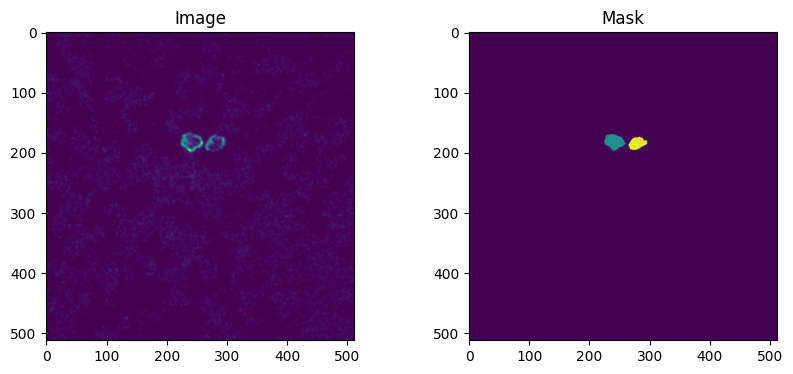

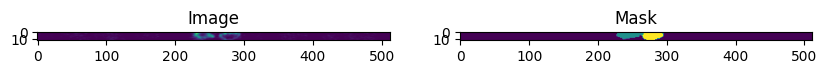

In [48]:
## Take slice

imxyslice = im[im.shape[0]//2]
imzyslice = im[:, 190]

maskxyslice = mod.eval(imxyslice, diameter=30, channels=[0,0], cellprob_threshold=4.5)[0]
maskzyslice = mod.eval(imzyslice, diameter=30, channels=[0,0])[0]

fig = imshow_multi2d([imxyslice, maskxyslice], ['Image', 'Mask'], 1, 2)
fig = imshow_multi2d([imzyslice, maskzyslice], ['Image', 'Mask'], 1, 2)

In [21]:
# make 3d image into collection of 2d

images = []

for i in range(im.shape[0]):
    images.append(im[i, :, :])

## try 3D segmentation

I couldn't get this to work... but maybe fiddling with diameter and anisotripy will get 

In [62]:

mask3D = mod.eval(images, diameter=10, channels=[0,0], cellprob_threshold=2.5, anisotropy=5,  do_3D=True)[0]

In [63]:
import numpy as np
mask3D_ = np.array(mask3D)

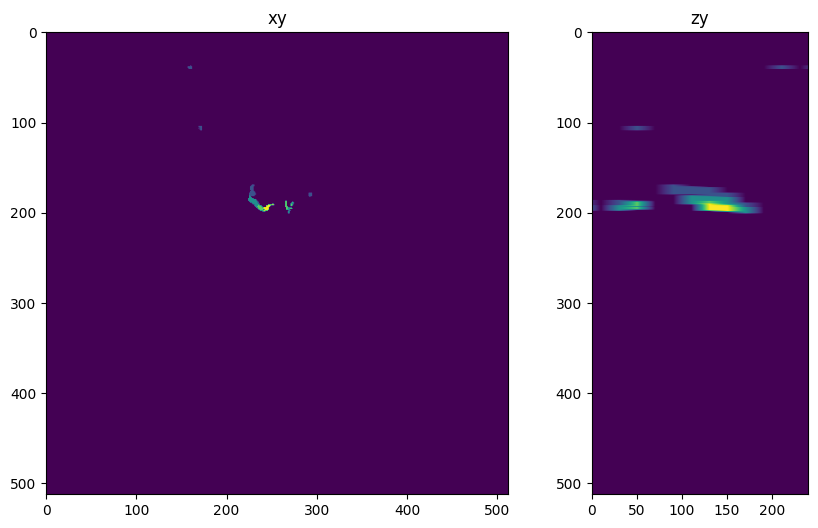

In [64]:
fig = show_xy_zy_max(mask3D_, sz=20, figsize=(10, 6))